In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import grid_search
from math import log
path = os.getcwd()

Number of training samples (1 - 48000)

In [2]:
n = 5000

Read dataset

In [3]:
trainingData = pd.read_csv(os.path.join(path,'data','train.csv'), index_col=False).get_values()[:,1:]
trainingLabels = pd.read_csv(os.path.join(path,'data','train.csv'), usecols=['label']).get_values()[:,0]
testData = pd.read_csv(os.path.join(path,'data','test.csv')).get_values()
testLabels = pd.read_csv(os.path.join(path,'data','out.csv'), usecols=['Label']).get_values()

Hyper-parameter optimisation using crossvalidation

In [4]:
params = []
scores = []
clfs = []
pcas = []
for n_pca in [0.05*x for x in range(10,20)]:
    # Dimensionality Reduction
    pcas.append(PCA(n_components=n_pca).fit(trainingData[:n,:]))
    trainingData_pca = pcas[-1].transform(trainingData[:n,:])
    testData_pca = pcas[-1].transform(testData)
    
    # Crossvalidation
    parameters = {'C':[10**x for x in range(-16,-9)]}
    svr = svm.SVC(kernel='poly', degree=3)
    clfs.append(grid_search.GridSearchCV(svr, parameters, n_jobs=4, cv=5, verbose=5))
    clfs[-1].fit(trainingData_pca, trainingLabels[:n])

    # Testerror
    score_pca = clfs[-1].score(testData_pca,testLabels)
    bestC_pca = clfs[-1].best_params_['C']
    
    params.append(bestC_pca)
    scores.append(score_pca)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.891000 -   0.6s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.877490 -   0.8s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.865731 -   0.8s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.869261 -   0.8s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.895582 -   0.6s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.0s


[CV] ................................ C=1e-14, score=0.889222 -   0.7s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.893000 -   0.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.905622 -   0.5s
[CV] ................................ C=1e-14, score=0.881764 -   0.7s
[CV] C=1e-13 .........................................................
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.884462 -   0.8s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.876248 -   0.7s
[CV] C=1e-12 .........................................................
[CV] ................................ C=1e-13, score=0.874000 -   0.6s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    6.1s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.901000 -   0.8s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.877756 -   0.9s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.887226 -   0.9s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.898406 -   1.0s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.926295 -   0.5s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.3s


[CV] ................................ C=1e-14, score=0.923000 -   0.7s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.915832 -   0.8s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.930723 -   1.0s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.920319 -   0.9s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.910180 -   0.7s
[CV] C=1e-12 .........................................................
[CV] ................................ C=1e-13, score=0.919000 -   0.7s
[CV] C=1e-12 .........................................................
[CV] ................................ C=1e-13, score=0.904810 -   0.7s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    6.4s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.914000 -   0.9s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.911355 -   0.9s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.892786 -   1.1s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.898204 -   1.2s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.936255 -   0.7s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.4s


[CV] ................................ C=1e-14, score=0.933134 -   0.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.939000 -   0.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.932866 -   0.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.948795 -   0.7s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.925299 -   0.7s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.932136 -   0.6s
[CV] C=1e-12 .........................................................
[CV] ................................ C=1e-13, score=0.941000 -   0.6s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    6.3s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.888224 -   1.2s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.885772 -   1.2s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.898000 -   1.3s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.894422 -   1.3s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.954183 -   0.7s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.9s


[CV] ................................ C=1e-14, score=0.941118 -   0.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.952000 -   0.7s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.954819 -   0.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.944890 -   0.7s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.935259 -   0.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.935130 -   0.8s
[CV] C=1e-12 .........................................................
[CV] ................................ C=1e-13, score=0.946000 -   0.7s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    7.2s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.860279 -   1.5s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.847695 -   1.7s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.871000 -   1.7s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.870518 -   1.9s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.949102 -   0.9s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    3.8s


[CV] ................................ C=1e-14, score=0.957086 -   0.9s
[CV] ................................ C=1e-15, score=0.949799 -   1.2s
[CV] C=1e-14 .........................................................
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.963000 -   0.9s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.952906 -   0.9s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.960843 -   0.9s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.951195 -   1.1s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.949102 -   1.0s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    9.2s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.814741 -   2.6s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.821000 -   2.6s
[CV] ................................ C=1e-16, score=0.797595 -   2.6s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.814371 -   2.7s
[CV] C=1e-15 .........................................................
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.948104 -   1.2s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.6s


[CV] ................................ C=1e-14, score=0.960080 -   1.2s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.967000 -   1.2s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.954910 -   1.1s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.961847 -   1.2s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.952096 -   1.1s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.957171 -   1.3s
[CV] C=1e-12 .........................................................
[CV] ................................ C=1e-13, score=0.967000 -   1.2s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:   13.3s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.704409 -   3.5s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.726096 -   3.7s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.707585 -   3.8s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.692000 -   4.4s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.925299 -   2.2s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    8.5s


[CV] ................................ C=1e-14, score=0.964143 -   2.0s
[CV] C=1e-14 .........................................................
[CV] ................................ C=1e-14, score=0.965070 -   1.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.968000 -   1.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.964859 -   1.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.956914 -   1.9s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.963147 -   1.5s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.959082 -   1.9s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:   18.3s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.351703 -   4.6s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.356574 -   5.0s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.363000 -   5.3s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.358283 -   5.4s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.893426 -   3.3s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   11.7s


[CV] ................................ C=1e-14, score=0.963074 -   2.4s
[CV] C=1e-14 .........................................................
[CV] ................................ C=1e-15, score=0.885542 -   3.1s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.966000 -   2.2s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.952906 -   2.3s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.961847 -   2.3s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.965139 -   2.7s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.966068 -   2.2s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:   26.1s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.136454 -   8.0s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.132735 -   8.5s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.134269 -   8.6s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.134000 -   9.0s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.770916 -   6.7s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   20.8s


[CV] ................................ C=1e-15, score=0.755511 -   7.8s
[CV] C=1e-14 .........................................................
[CV] ................................ C=1e-15, score=0.761044 -   7.5s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.955000 -   4.8s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.930862 -   3.8s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.938755 -   4.4s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.964143 -   4.0s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.969062 -   3.8s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:   44.1s finished


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.112000 -  16.7s
[CV] C=1e-16 .........................................................
[CV] ................................ C=1e-16, score=0.111554 -  16.8s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.111222 -  16.8s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-16, score=0.111776 -  17.4s
[CV] C=1e-15 .........................................................
[CV] ................................ C=1e-15, score=0.175649 -  16.1s
[CV] C=1e-15 ....

[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   46.4s


[CV] ................................ C=1e-15, score=0.175351 -  16.5s
[CV] C=1e-14 .........................................................
[CV] ................................ C=1e-15, score=0.171687 -  17.1s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.863000 -  11.9s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.961155 -   7.9s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.835671 -  12.6s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-14, score=0.849398 -  13.5s
[CV] C=1e-13 .........................................................
[CV] ................................ C=1e-13, score=0.960080 -   8.4s
[CV] C=1e-12 .........................................................
[CV] .

[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:  1.6min finished


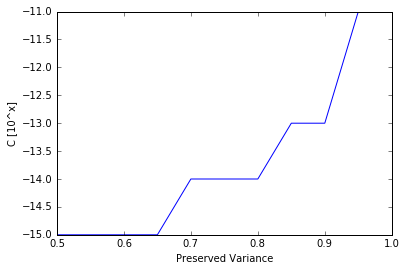

In [5]:
plt.xlabel('Preserved Variance');plt.ylabel('C [10^x]')
plt.plot([0.05*x for x in range(10,20)], [log(x,10) for x in params])
plt.show()

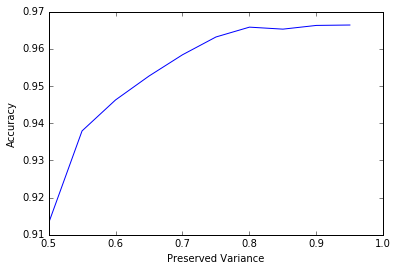

In [6]:
plt.xlabel('Preserved Variance');plt.ylabel('Accuracy')
plt.plot([0.05*x for x in range(10,20)], scores)
plt.show()

Visualise and label random sample

In [7]:
randomImg = np.array([testData[np.random.randint(testData.shape[0]-1)]])
pca = PCA(n_components=0.8).fit(trainingData)
randomSample = pca.transform(randomImg)
clf = svm.SVC(kernel='poly', degree=3, C=10e-14).fit(pca.transform(trainingData), trainingLabels)
randomLabel = clf.predict(randomSample)

In [10]:
print ('Full model accuracy: '+str(clf.score(pca.transform(testData),testLabels)))

Full model accuracy: 0.9835


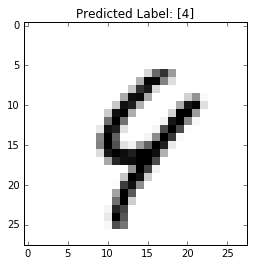

In [11]:
plt.imshow(randomImg.reshape((28,28)), interpolation="nearest", cmap='gray_r')
plt.title('Predicted Label: '+str(randomLabel));plt.show()